In [8]:
import os
import glob
import numpy as np
import pandas as pd

import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [9]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','stations','Italy_raingauges')

In [10]:
veneto_dir = os.path.join('/','media','arturo','T9','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [11]:
dir_input = os.path.join(dir_base, 'METADATA', 'METADATA_INTENSE_NOQC_update.csv')
METADATA = pd.read_csv(dir_input)
METADATA.head(3)

,File,ISO,Region,Code,Name,Elevation,Orig_EPSG,CRS_E,CRS_N,Lat,Lon,Year_Start,Year_End,INTENSE_Resp,AGENCY,Source,TimeZone,Agency
0,IT-210_PIE-001030-900_0060.csv,IT-210,Piedmont,PIE-001030-900,BORGOFRANCODIVREA,337.0,32632.0,410005.0,5040731.0,45.514302,7.847798,1988-05-08 05:00:00,2024-09-09 01:00:00,DT,ARPA Piemonte,Piedmont,UTC,NaN
1,IT-210_PIE-001097-900_0060.csv,IT-210,Piedmont,PIE-001097-900,CUMIANA,327.0,32632.0,373092.0,4980177.0,44.963696,7.390821,1988-01-29 03:00:00,2024-09-18 12:00:00,DT,ARPA Piemonte,Piedmont,UTC,NaN
2,IT-210_PIE-001128-900_0060.csv,IT-210,Piedmont,PIE-001128-900,LANZO,580.0,32632.0,381803.0,5016138.0,45.288798,7.492737,1989-09-02 02:00:00,2024-09-09 05:00:00,DT,ARPA Piemonte,Piedmont,UTC,NaN


In [12]:
lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

In [13]:
# # READ DATA
# file_name = METADATA['File'].iloc[0]
# data_ = pd.read_csv(os.path.join(dir_base,'DATA',str(file_name.split('_')[0]),file_name))

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Text(0.0, 1.0, 'Total of Rain Gauges: 3180')

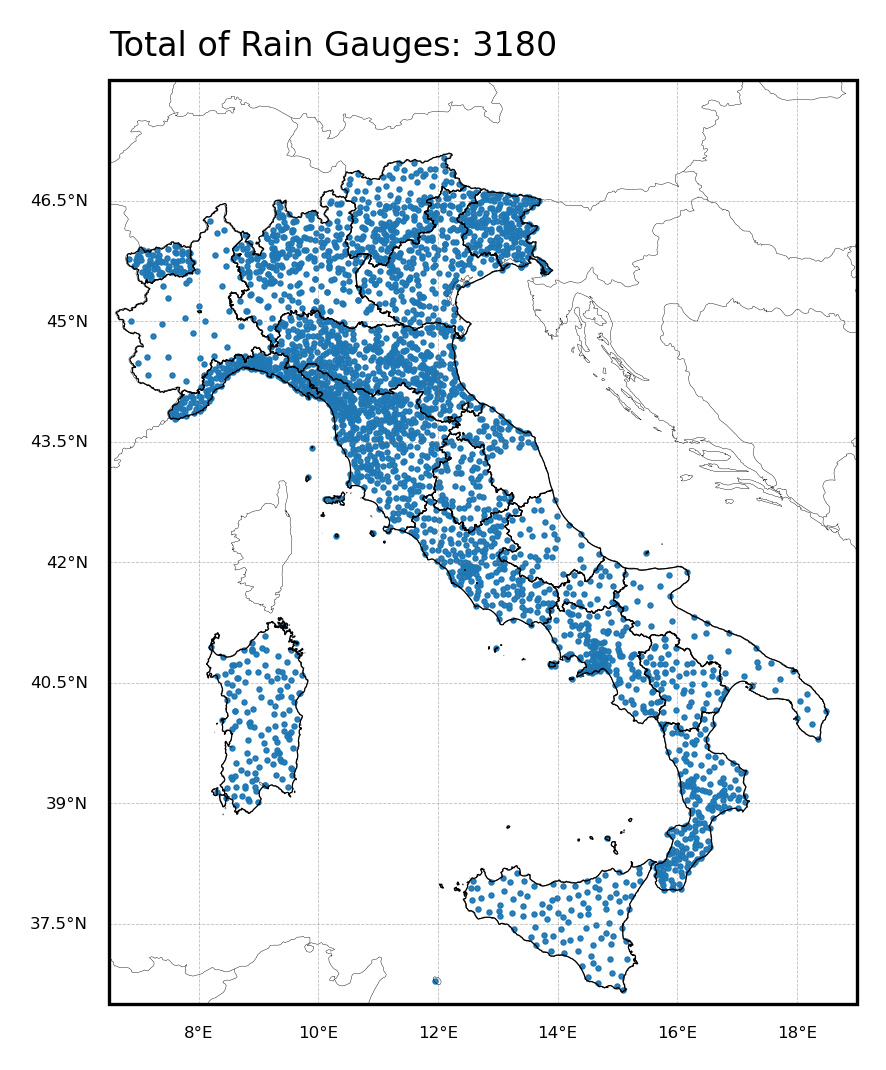

In [14]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

# =============================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([lon_min, lon_max, lat_min, lat_max],crs=proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.1,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.1,color='black',zorder=4)
REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.3)

ax1.scatter(METADATA['Lon'], METADATA['Lat'], s=0.3)

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

ax1.set_title(f'Total of Rain Gauges: {len(METADATA)}', fontsize=8, loc='left')